In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("weatherAUS.csv")

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Анализ таргета

In [4]:
data["RainTomorrow"].isna().sum()

np.int64(3267)

In [5]:
data = data[~data["RainTomorrow"].isna()]

In [6]:
data["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [7]:
def format_features(feature: str):
    if feature == "Yes":
        return 1
    else:
        return 0

data[["RainTomorrow", "RainToday"]] = data[["RainTomorrow", "RainToday"]].apply(lambda col: col.map({"Yes": 1, "No": 0}))

/var/folders/93/535pp3s56c53qkqt3srcr9fw0000gn/T/ipykernel_34621/1548360690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["RainTomorrow", "RainToday"]] = data[["RainTomorrow", "RainToday"]].apply(lambda col: col.map({"Yes": 1, "No": 0}))


In [8]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0


### Удалим признаки с пропусками > 30%

In [9]:
missed_values = data.isna().sum().to_dict()

features_to_drop = []
for feature in missed_values:
    if missed_values[feature] > 0.3 * len(data):
        features_to_drop.append(feature)

print(f"Features to drop: {features_to_drop}")

data = data.drop(columns=features_to_drop)

Features to drop: ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


### Решаем задачу линейной классификации -> смотрим корреляции численных величин

### Все остальные признаки имеют какое-то значение для модели, так что оставим их, заполнив пропущенные непрерывные признаки их средним значением

In [10]:
numeric_features = data.select_dtypes(np.number).columns.to_list()
numeric_features = list(set(numeric_features).difference({"RainTomorrow"}))

In [11]:
numeric_features

['Pressure9am',
 'MaxTemp',
 'WindSpeed3pm',
 'Humidity3pm',
 'Pressure3pm',
 'MinTemp',
 'WindGustSpeed',
 'Temp3pm',
 'WindSpeed9am',
 'RainToday',
 'Rainfall',
 'Temp9am',
 'Humidity9am']

In [12]:
numeric_data = data[numeric_features]
numeric_data_mean = numeric_data.mean()

data = data.fillna(numeric_data_mean)

In [13]:
correlations = data[numeric_features].corrwith(data["RainTomorrow"]).sort_values(ascending=False)

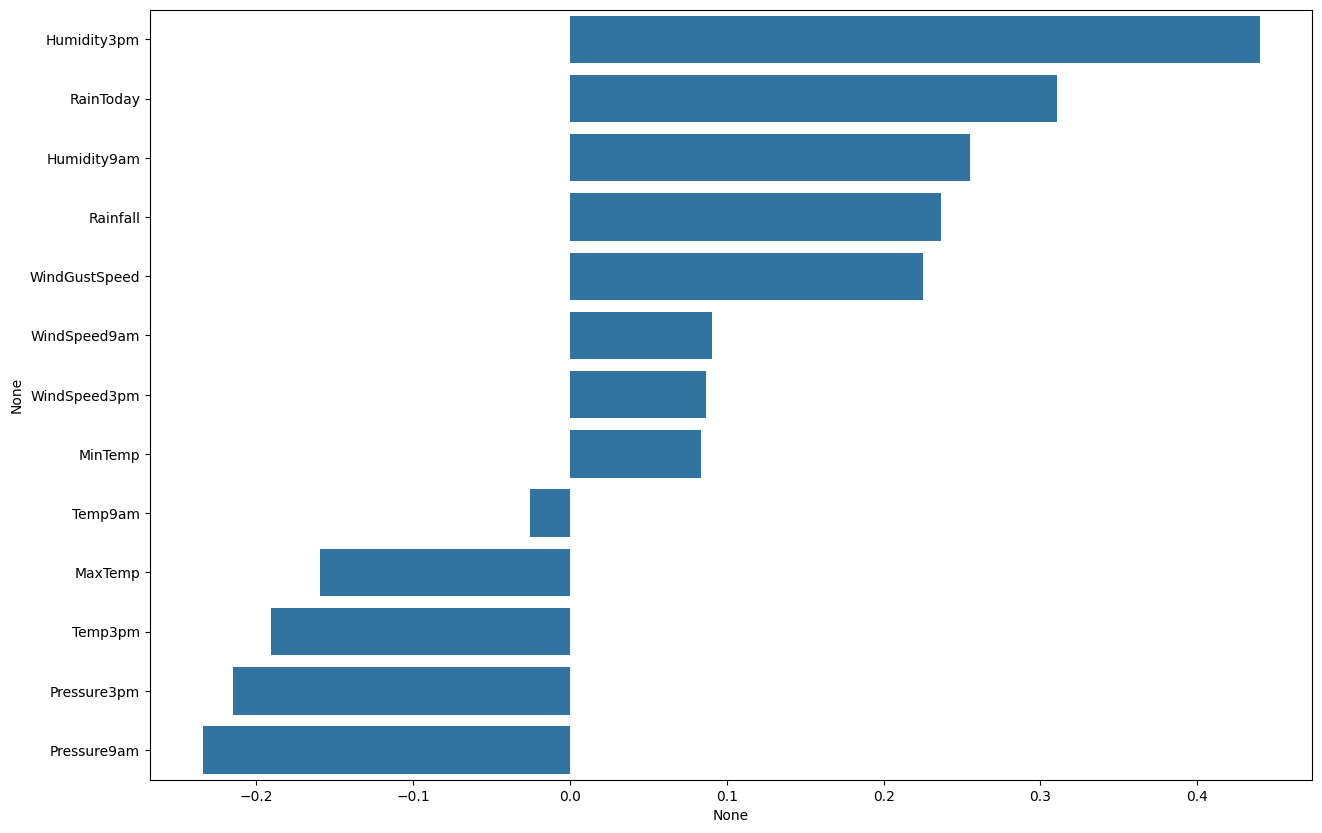

In [16]:
import seaborn as sns

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [17]:
from scipy.stats import pointbiserialr

In [36]:
corr_coeffs = []

for feature in numeric_features:
    corr_coeffs.append(pointbiserialr(data[feature], data["RainTomorrow"]).statistic)

feature_indices = np.argsort(corr_coeffs)[::-1]

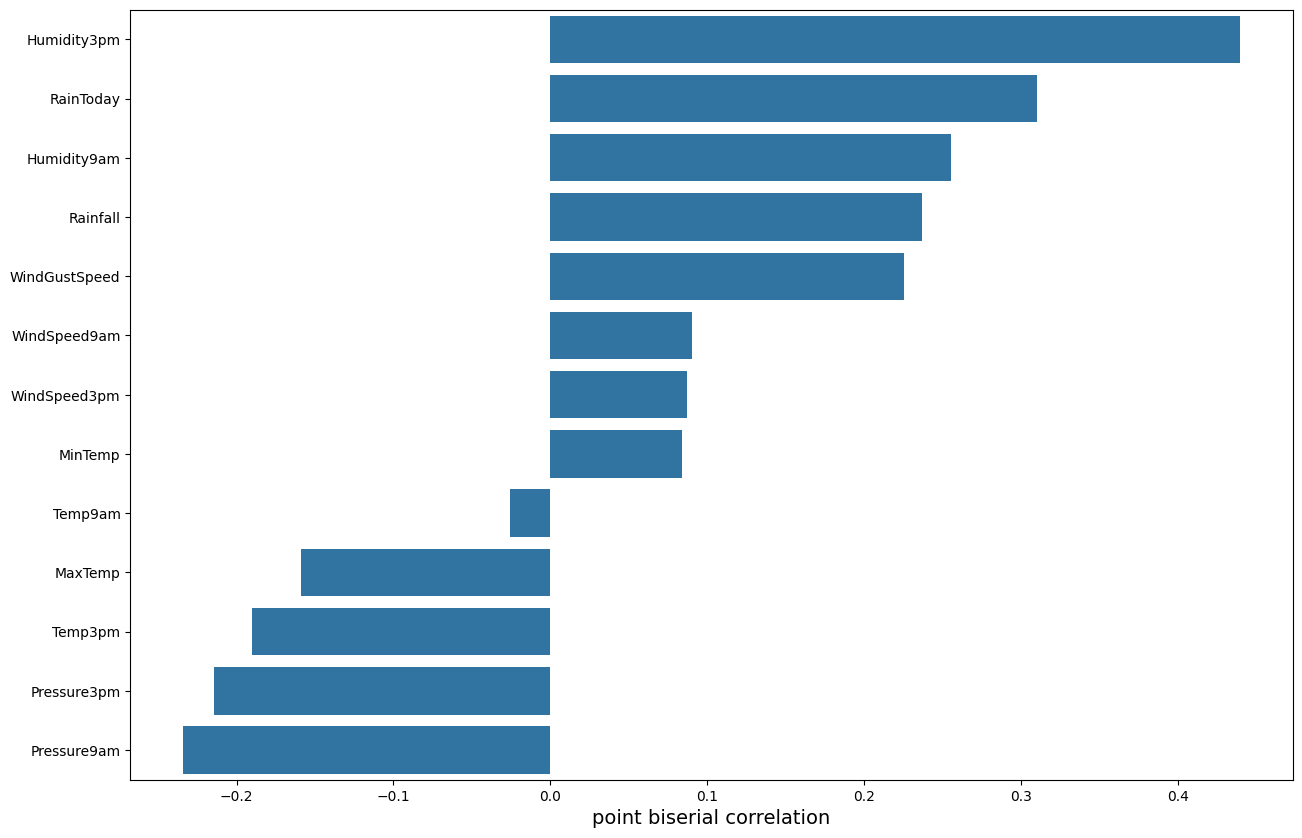

In [45]:
plot = sns.barplot(y=np.array(numeric_features)[feature_indices], x=np.array(corr_coeffs, dtype=float)[feature_indices])
plot.figure.set_size_inches(15, 10)
plt.xlabel("point biserial correlation", size="14")
plt.show()

In [21]:
from sklearn.feature_selection import mutual_info_classif

mutual_information = mutual_info_classif(data[numeric_features], data["RainTomorrow"])

In [22]:
mutual_information

array([0.026986  , 0.02091731, 0.00649536, 0.05858971, 0.0382237 ,
       0.02377882, 0.00185623, 0.04616269, 0.00539279, 0.03043614,
       0.01412242, 0.1128872 , 0.00434902])

In [23]:
feature_indices = np.argsort(mutual_information)[::-1]

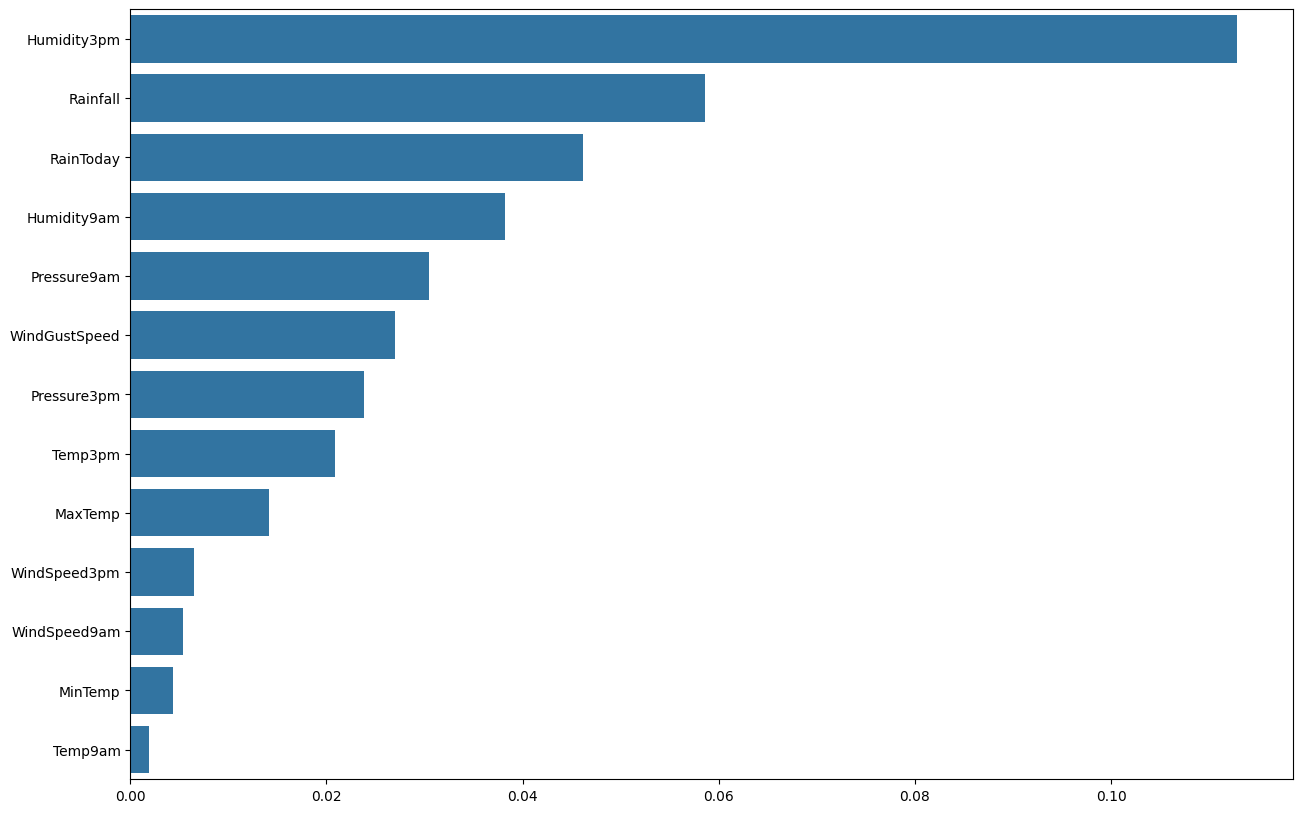

In [24]:
plot = sns.barplot(y=np.array(numeric_features)[feature_indices], x=mutual_information[feature_indices])
plot.figure.set_size_inches(15, 10)

### Анализ категориальных признаков

In [25]:
categorial_features = list(set(data.columns).difference(set(numeric_features)))
categorial_features.remove("RainTomorrow")
categorial_features

['WindDir9am', 'Location', 'WindGustDir', 'Date', 'WindDir3pm']

In [26]:
for feature in categorial_features:
    print(f"{feature} unique values: {data[feature].unique().shape[0]}")

WindDir9am unique values: 17
Location unique values: 49
WindGustDir unique values: 17
Date unique values: 3436
WindDir3pm unique values: 17


### Достаточно много уникальных значений, поэтому пока не будем заниматься их кодированием и оставим только количественные признаки

In [27]:
data = data.drop(columns=categorial_features)

### Нормализация оставшихся признаков

In [30]:
normalized_data = (data[numeric_features] - data[numeric_features].min()) / (data[numeric_features].max() - data[numeric_features].min())
normalized_data -= normalized_data.mean()

In [34]:
normalized_data["RainTomorrow"] = data["RainTomorrow"].replace({0: -1})

# Сохранение обработанного датасета

In [35]:
normalized_data.to_csv("processed_dataset.csv")